In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:

lr = pd.read_csv("https://raw.githubusercontent.com/venkatareddykonasani/Datasets/master/AirPassengers/AirPassengers.csv")


In [34]:

lr.head()

,Week_num,Passengers,Promotion_Budget,Service_Quality_Score,Holiday_week,Delayed_Cancelled_flight_ind,Inter_metro_flight_ratio,Bad_Weather_Ind,Technical_issues_ind
0,1,37824,517356,4.00000,NO,NO,0.70,YES,YES
1,2,43936,646086,2.67466,NO,YES,0.80,YES,YES
2,3,42896,638330,3.29473,NO,NO,0.90,NO,NO
3,4,35792,506492,3.85684,NO,NO,0.40,NO,NO
4,5,38624,609658,3.90757,NO,NO,0.87,NO,YES


In [35]:
lr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Week_num                      80 non-null     int64  
 1   Passengers                    80 non-null     int64  
 2   Promotion_Budget              80 non-null     int64  
 3   Service_Quality_Score         80 non-null     float64
 4   Holiday_week                  80 non-null     object 
 5   Delayed_Cancelled_flight_ind  80 non-null     object 
 6   Inter_metro_flight_ratio      80 non-null     float64
 7   Bad_Weather_Ind               80 non-null     object 
 8   Technical_issues_ind          80 non-null     object 
dtypes: float64(2), int64(3), object(4)
memory usage: 5.8+ KB


In [36]:
lr.shape

(80, 9)

In [37]:
lr.isnull().sum()

,0
Week_num,0
Passengers,0
Promotion_Budget,0
Service_Quality_Score,0
Holiday_week,0
Delayed_Cancelled_flight_ind,0
Inter_metro_flight_ratio,0
Bad_Weather_Ind,0
Technical_issues_ind,0


In [38]:
lr.describe()

,Week_num,Passengers,Promotion_Budget,Service_Quality_Score,Inter_metro_flight_ratio
count,80.0000,80.000000,8.000000e+01,80.000000,80.000000
mean,40.5000,44745.025000,6.254223e+05,2.781168,0.693000
std,23.2379,11267.155215,1.565143e+05,1.000204,0.158045
min,1.0000,28700.000000,3.656800e+05,0.855360,0.380000
25%,20.7500,36424.000000,5.178915e+05,1.931580,0.610000
50%,40.5000,43144.000000,5.979190e+05,3.108120,0.720000
75%,60.2500,48864.000000,6.885935e+05,3.608882,0.802500
max,80.0000,81228.000000,1.108254e+06,4.000000,0.900000


In [41]:
np.corrcoef(lr.Passengers,lr.Promotion_Budget)

array([[1.        , 0.96585103],
       [0.96585103, 1.        ]])

In [44]:
lr['Technical_issues_ind'].value_counts()

,count
Technical_issues_ind,
NO,42
YES,38


In [45]:
lr['Holiday_week'].value_counts()

,count
Holiday_week,
NO,61
YES,19


In [46]:
lr['Bad_Weather_Ind'].value_counts()

,count
Bad_Weather_Ind,
YES,40
NO,40


In [48]:
lr['Delayed_Cancelled_flight_ind'].value_counts()

,count
Delayed_Cancelled_flight_ind,
YES,41
NO,39


In [54]:
lr['Delayed_Cancelled_flight_ind'].replace('YES',1,inplace=True)
lr['Delayed_Cancelled_flight_ind'].replace('NO',0,inplace=True)

In [55]:
lr['Bad_Weather_Ind'].replace('YES',1,inplace=True)
lr['Bad_Weather_Ind'].replace('NO',0,inplace=True)

In [56]:
lr["Holiday_week"].replace('YES',1,inplace=True)
lr["Holiday_week"].replace('NO',0,inplace=True)

In [57]:
lr['Technical_issues_ind'].replace('YES',1,inplace=True)
lr['Technical_issues_ind'].replace('NO',0,inplace=True)

In [58]:
lr.head()

,Week_num,Passengers,Promotion_Budget,Service_Quality_Score,Holiday_week,Delayed_Cancelled_flight_ind,Inter_metro_flight_ratio,Bad_Weather_Ind,Technical_issues_ind
0,1,37824,517356,4.00000,0,0,0.70,1,1
1,2,43936,646086,2.67466,0,1,0.80,1,1
2,3,42896,638330,3.29473,0,0,0.90,0,0
3,4,35792,506492,3.85684,0,0,0.40,0,0
4,5,38624,609658,3.90757,0,0,0.87,0,1


In [59]:
# correlation
lr.corr()

,Week_num,Passengers,Promotion_Budget,Service_Quality_Score,Holiday_week,Delayed_Cancelled_flight_ind,Inter_metro_flight_ratio,Bad_Weather_Ind,Technical_issues_ind
Week_num,1.000000,0.412820,0.392003,-0.394892,0.407681,0.053606,0.188979,0.016239,-0.002168
Passengers,0.412820,1.000000,0.965851,-0.886530,0.821298,0.116224,0.491947,0.114404,-0.243588
Promotion_Budget,0.392003,0.965851,1.000000,-0.843382,0.757834,0.127543,0.531449,0.119175,-0.210171
Service_Quality_Score,-0.394892,-0.886530,-0.843382,1.000000,-0.824317,-0.048547,-0.443437,-0.052978,0.167894
Holiday_week,0.407681,0.821298,0.757834,-0.824317,1.000000,0.015426,0.320381,0.029374,-0.177933
Delayed_Cancelled_flight_ind,0.053606,0.116224,0.127543,-0.048547,0.015426,1.000000,0.034553,0.875274,-0.174022
Inter_metro_flight_ratio,0.188979,0.491947,0.531449,-0.443437,0.320381,0.034553,1.000000,0.068448,-0.008607
Bad_Weather_Ind,0.016239,0.114404,0.119175,-0.052978,0.029374,0.875274,0.068448,1.000000,-0.150188
Technical_issues_ind,-0.002168,-0.243588,-0.210171,0.167894,-0.177933,-0.174022,-0.008607,-0.150188,1.000000


<Axes: >

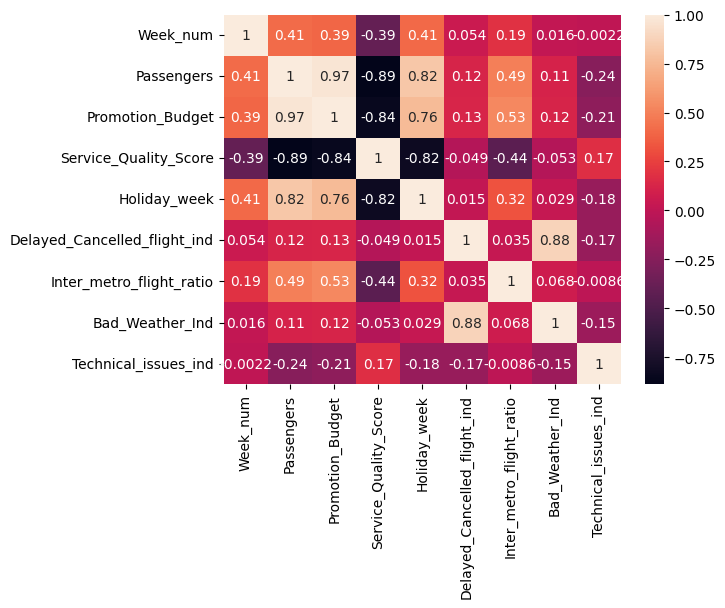

In [60]:
# correlation matrix plot

sns.heatmap(lr.corr(),annot=True)

In [95]:
import statsmodels.formula.api as sm
import statsmodels.api as sms
y = lr['Passengers']
X = lr.drop('Passengers',axis=1)
print(sms.OLS(y,X).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:             Passengers   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                              2771.
Date:                Sun, 01 Sep 2024   Prob (F-statistic):                    2.11e-86
Time:                        03:29:02   Log-Likelihood:                         -743.32
No. Observations:                  80   AIC:                                      1503.
Df Residuals:                      72   BIC:                                      1522.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [96]:
X1 = X.drop('Delayed_Cancelled_flight_ind',axis=1)
print(sms.OLS(y,X1).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:             Passengers   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                              3209.
Date:                Sun, 01 Sep 2024   Prob (F-statistic):                    3.65e-88
Time:                        03:31:11   Log-Likelihood:                         -743.35
No. Observations:                  80   AIC:                                      1501.
Df Residuals:                      73   BIC:                                      1517.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [100]:
X2 = X1.drop('Bad_Weather_Ind',axis=1)
print(sms.OLS(y,X2).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:             Passengers   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                              3789.
Date:                Sun, 01 Sep 2024   Prob (F-statistic):                    6.03e-90
Time:                        03:33:18   Log-Likelihood:                         -743.41
No. Observations:                  80   AIC:                                      1499.
Df Residuals:                      74   BIC:                                      1513.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [101]:
X3 = X2.drop('Inter_metro_flight_ratio',axis=1)
print(sms.OLS(y,X3).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:             Passengers   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              4574.
Date:                Sun, 01 Sep 2024   Prob (F-statistic):                    1.11e-91
Time:                        03:33:19   Log-Likelihood:                         -743.70
No. Observations:                  80   AIC:                                      1497.
Df Residuals:                      75   BIC:                                      1509.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [102]:
X4 = X3.drop('Technical_issues_ind',axis=1)
print(sms.OLS(y,X4).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:             Passengers   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              5741.
Date:                Sun, 01 Sep 2024   Prob (F-statistic):                    1.94e-93
Time:                        03:34:02   Log-Likelihood:                         -744.07
No. Observations:                  80   AIC:                                      1496.
Df Residuals:                      76   BIC:                                      1506.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [103]:
X5 = X4.drop('Week_num',axis=1)
print(sms.OLS(y,X5).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:             Passengers   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              7691.
Date:                Sun, 01 Sep 2024   Prob (F-statistic):                    2.78e-95
Time:                        03:34:58   Log-Likelihood:                         -744.41
No. Observations:                  80   AIC:                                      1495.
Df Residuals:                      77   BIC:                                      1502.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [71]:
sm.ols(formula='Passengers ~ Inter_metro_flight_ratio',data=lr).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Passengers   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     24.90
Date:                Sun, 01 Sep 2024   Prob (F-statistic):           3.58e-06
Time:                        02:50:03   Log-Likelihood:                -848.30
No. Observations:                  80   AIC:                             1701.
Df Residuals:                      78   BIC:                             1705.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 2.044e+04   4993.747      4.093      0.000    1.05e+04    3.04e+04
Inter_metro_flight_ratio  3.507e+04   7027.768      4.990      0.000    2.11e+04    4.91e+04
==============================================================================
Omnibus:                       10.172   Durbin-Watson:                   1.385
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               10.098
Skew:                           0.822   Prob(JB):                      0.00641
Kurtosis:                       3.573   Cond. No.                         9.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
sm.ols(formula='Passengers ~ Holiday_week',data=lr).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Passengers   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     161.7
Date:                Sun, 01 Sep 2024   Prob (F-statistic):           1.06e-20
Time:                        02:50:35   Log-Likelihood:                -814.48
No. Observations:                  80   AIC:                             1633.
Df Residuals:                      78   BIC:                             1638.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     3.961e+04    828.267     47.826      0.000     3.8e+04    4.13e+04
Holiday_week  2.161e+04   1699.568     12.714      0.000    1.82e+04     2.5e+04
==============================================================================
Omnibus:                        5.455   Durbin-Watson:                   1.717
Prob(Omnibus):                  0.065   Jarque-Bera (JB):                4.931
Skew:                           0.600   Prob(JB):                       0.0850
Kurtosis:                       3.197   Cond. No.                         2.51
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
sm.ols(formula='Passengers ~ Service_Quality_Score',data=lr).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Passengers   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     286.4
Date:                Sun, 01 Sep 2024   Prob (F-statistic):           7.88e-28
Time:                        03:04:01   Log-Likelihood:                -797.72
No. Observations:                  80   AIC:                             1599.
Df Residuals:                      78   BIC:                             1604.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              7.252e+04   1742.925     41.608      0.000     6.9e+04     7.6e+04
Service_Quality_Score -9986.6349    590.134    -16.923      0.000   -1.12e+04   -8811.768
==============================================================================
Omnibus:                        6.997   Durbin-Watson:                   1.713
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                7.571
Skew:                           0.450   Prob(JB):                       0.0227
Kurtosis:                       4.209   Cond. No.                         9.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
sm.ols(formula='Passengers ~ Promotion_Budget + Holiday_week',data=lr).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Passengers   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     757.3
Date:                Sun, 01 Sep 2024   Prob (F-statistic):           2.29e-51
Time:                        02:51:48   Log-Likelihood:                -738.24
No. Observations:                  80   AIC:                             1482.
Df Residuals:                      77   BIC:                             1490.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         7109.2280   1580.807      4.497      0.000    3961.440    1.03e+04
Promotion_Budget     0.0581      0.003     21.000      0.000       0.053       0.064
Holiday_week      5522.1063   1010.820      5.463      0.000    3509.307    7534.905
==============================================================================
Omnibus:                        1.385   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.500   Jarque-Bera (JB):                1.120
Skew:                          -0.025   Prob(JB):                        0.571
Kurtosis:                       2.422   Cond. No.                     4.02e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.02e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
sm.ols(formula='Passengers ~ Promotion_Budget + Inter_metro_flight_ratio',data=lr).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Passengers   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     540.5
Date:                Sun, 01 Sep 2024   Prob (F-statistic):           4.76e-46
Time:                        02:52:17   Log-Likelihood:                -750.96
No. Observations:                  80   AIC:                             1508.
Df Residuals:                      77   BIC:                             1515.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 2017.7724   1624.803      1.242      0.218   -1217.624    5253.169
Promotion_Budget             0.0707      0.002     28.297      0.000       0.066       0.076
Inter_metro_flight_ratio -2121.5208   2473.189     -0.858      0.394   -7046.268    2803.227
==============================================================================
Omnibus:                       26.259   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.075
Skew:                          -0.096   Prob(JB):                       0.0791
Kurtosis:                       1.781   Cond. No.                     5.25e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.25e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [82]:
sm.ols(formula='Passengers ~ Promotion_Budget + Inter_metro_flight_ratio + Holiday_week + Service_Quality_Score',data=lr).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Passengers   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     417.2
Date:                Sun, 01 Sep 2024   Prob (F-statistic):           2.11e-50
Time:                        03:04:24   Log-Likelihood:                -733.53
No. Observations:                  80   AIC:                             1477.
Df Residuals:                      75   BIC:                             1489.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 1.657e+04   3458.307      4.790      0.000    9677.078    2.35e+04
Promotion_Budget             0.0528      0.004     15.050      0.000       0.046       0.060
Inter_metro_flight_ratio  -920.6967   2044.804     -0.450      0.654   -4994.156    3152.763
Holiday_week              3615.2533   1153.833      3.133      0.002    1316.701    5913.806
Service_Quality_Score    -1812.1163    593.200     -3.055      0.003   -2993.832    -630.401
==============================================================================
Omnibus:                        1.540   Durbin-Watson:                   2.233
Prob(Omnibus):                  0.463   Jarque-Bera (JB):                1.211
Skew:                           0.061   Prob(JB):                        0.546
Kurtosis:                       2.410   Cond. No.                     8.56e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.56e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [83]:
sm.ols(formula='Passengers ~ Promotion_Budget + Holiday_week + Service_Quality_Score',data=lr).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Passengers   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     562.1
Date:                Sun, 01 Sep 2024   Prob (F-statistic):           9.03e-52
Time:                        03:11:00   Log-Likelihood:                -733.63
No. Observations:                  80   AIC:                             1475.
Df Residuals:                      76   BIC:                             1485.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               1.62e+04   3341.842      4.847      0.000    9540.985    2.29e+04
Promotion_Budget          0.0522      0.003     16.007      0.000       0.046       0.059
Holiday_week           3703.0523   1131.256      3.273      0.002    1449.962    5956.143
Service_Quality_Score -1790.4133    588.130     -3.044      0.003   -2961.775    -619.052
==============================================================================
Omnibus:                        1.582   Durbin-Watson:                   2.238
Prob(Omnibus):                  0.453   Jarque-Bera (JB):                1.225
Skew:                           0.055   Prob(JB):                        0.542
Kurtosis:                       2.404   Cond. No.                     8.20e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.2e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [104]:
# variation inflation factor

from statsmodels.stats.outliers_influence import variance_inflation_factor

X = lr[['Promotion_Budget','Holiday_week','Service_Quality_Score']]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)


                 feature        VIF
0       Promotion_Budget  13.620000
1           Holiday_week   4.078631
2  Service_Quality_Score   8.571264


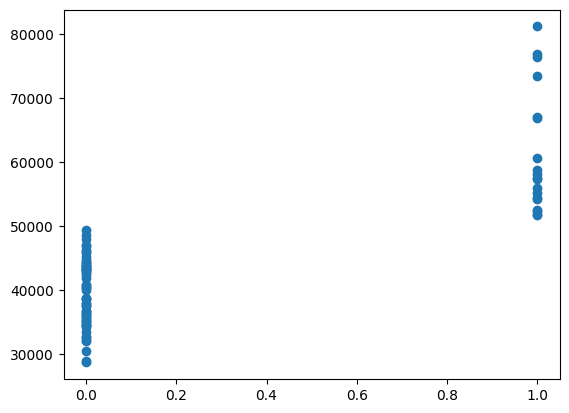

In [84]:
plt.scatter(lr.Holiday_week,lr.Passengers)

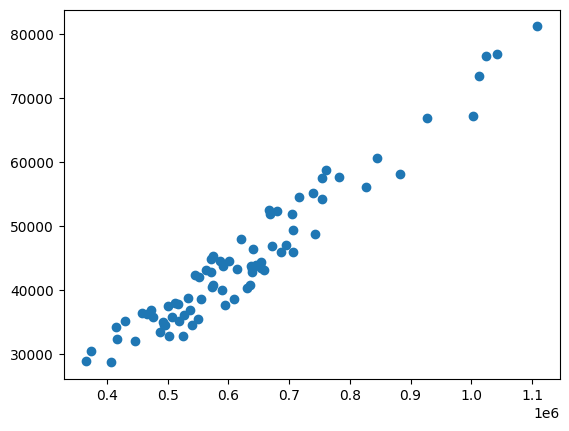

In [85]:
plt.scatter(lr.Promotion_Budget,lr.Passengers)

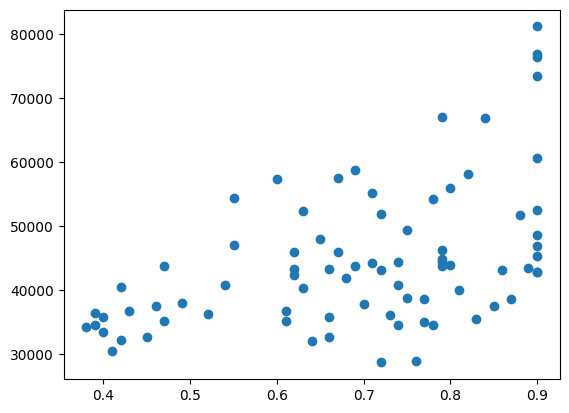

In [86]:
plt.scatter(lr.Inter_metro_flight_ratio,lr.Passengers)

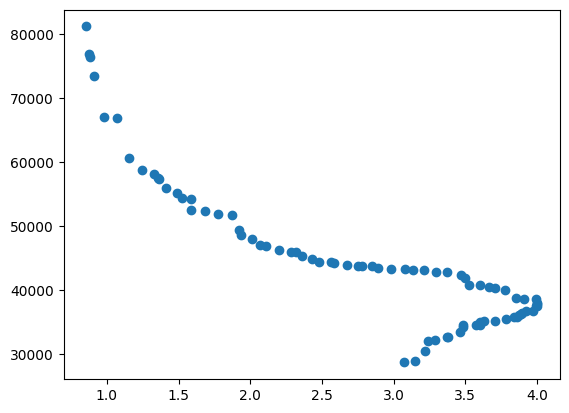

In [87]:
plt.scatter(lr.Service_Quality_Score,lr.Passengers)